# **Importing Libraries**

In [1]:
#Importing Liabraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [11]:
# Igonoring Warnings

import warnings
warnings.filterwarnings('ignore')

# **Data** **Collecting** 

In [4]:
# Loading Data

df = pd.read_csv('Customerdataset.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **Data Preprocessing**

In [5]:
df.shape

(200, 5)

In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [9]:
df.drop(["CustomerID"], axis=1, inplace=True)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [10]:
# Populate list of numerical and categorical variables

import pandas as pd
import pandas.api.types as ptypes

num_list = []
cat_list = []

for column in df:
  if ptypes.is_numeric_dtype(df[column]):
    num_list.append(column) 
  elif ptypes.is_string_dtype(df[column]):
    cat_list.append(column)

print("numeric: ", num_list) 
print("categorical: ", cat_list)

numeric:  ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
categorical:  ['Gender']


# **Distribution**

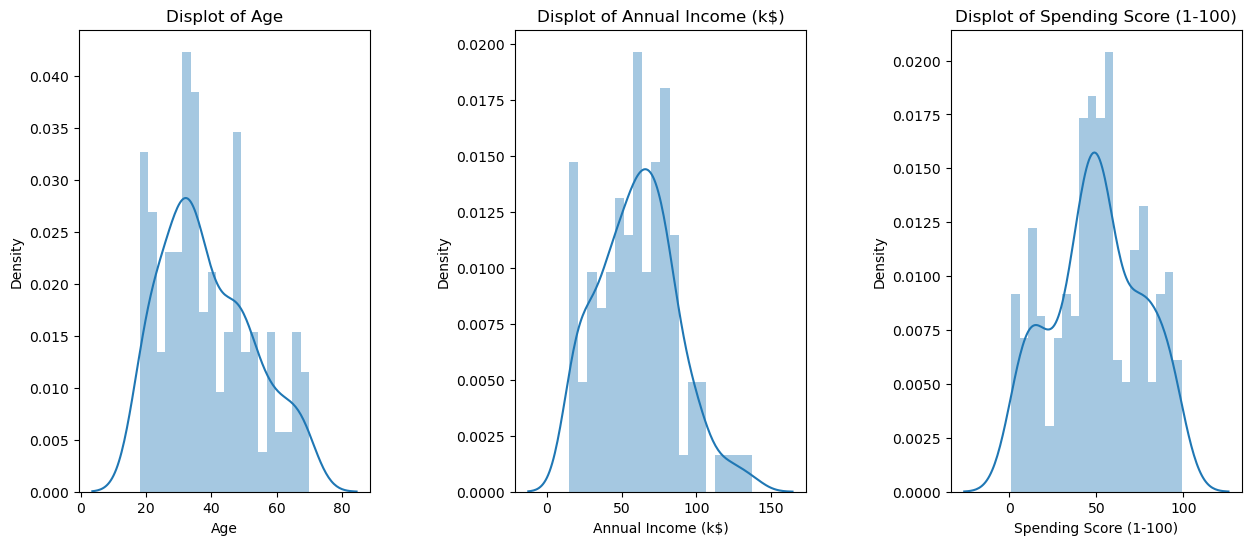

In [12]:
plt.figure(1, figsize=(15,6))
n=0
for x in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
  n+=1
  plt.subplot(1,3,n)
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.distplot(df[x], bins=20)
  plt.title('Displot of {}'.format(x))
plt.show()

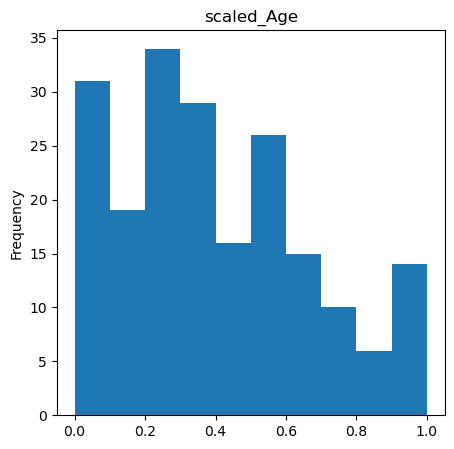

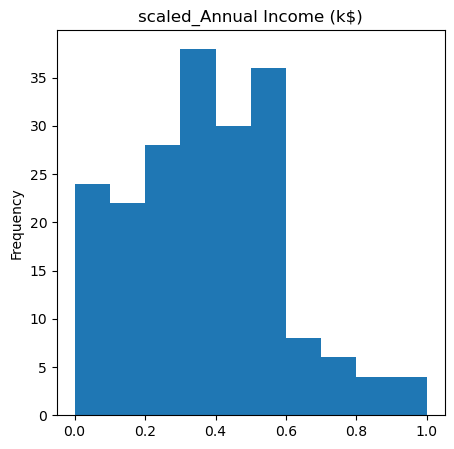

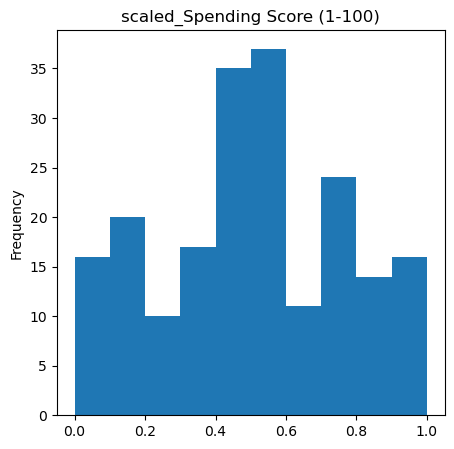

In [13]:
#transform data into the standard scale

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for var in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
  scaled_var = "scaled_" + var
  smodel = scaler.fit(df[var].values.reshape(-1,1))
  df[scaled_var] = smodel.transform(df[var].values.reshape(-1, 1))

  plt.figure(figsize = (5,5))
  print()
  plt.title(scaled_var)
  print()
  df[scaled_var].plot(kind = 'hist')
  print()
  plt.show()

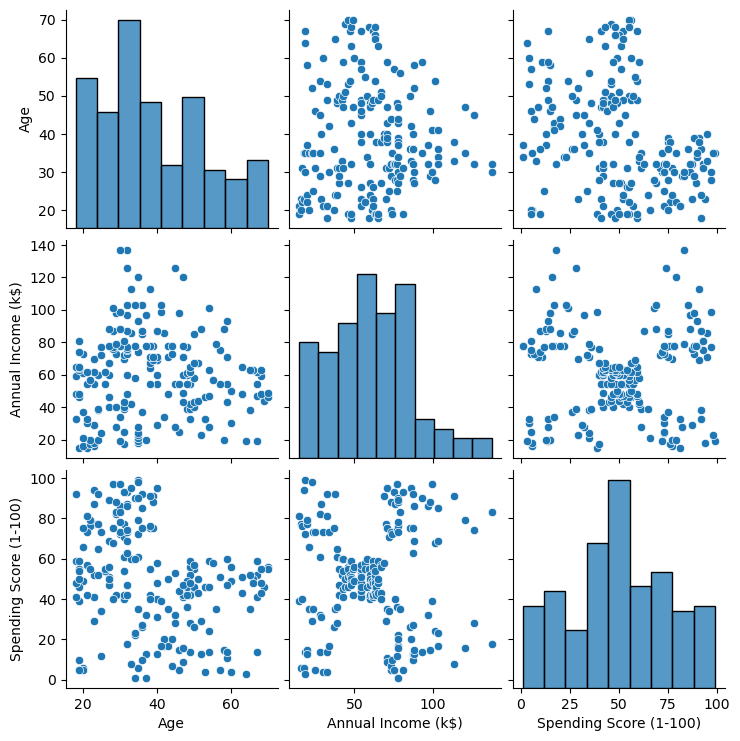

In [14]:
import seaborn as sns
columns = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
sns.pairplot(df[columns])

# **Spending** **score** **&** **Annual** **income**

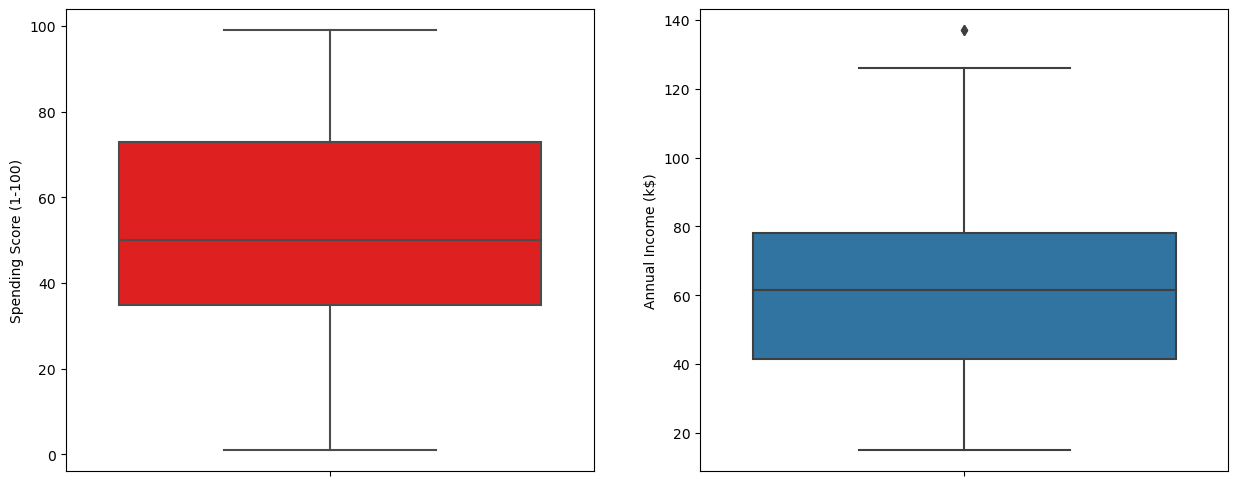

In [15]:
# Spending score & annual income
    
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y=df["Spending Score (1-100)"], color="red")
plt.subplot(1,2,2)
sns.boxplot(y=df["Annual Income (k$)"])
plt.show()

# **Distribution of male & female population**

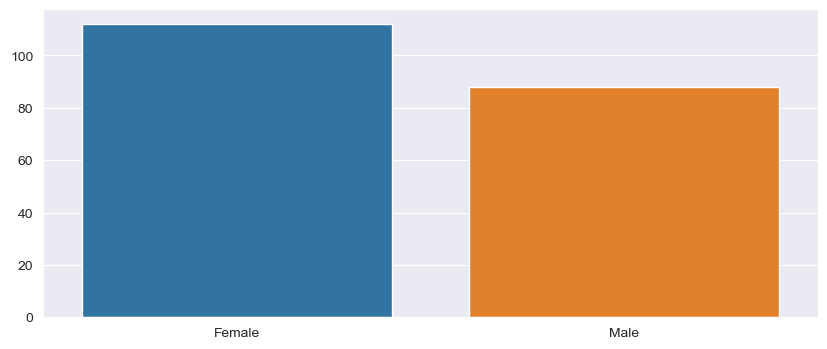

In [16]:
# Distribution of male & female population

genders = df.Gender.value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x=genders.index, y=genders.values)
plt.show()

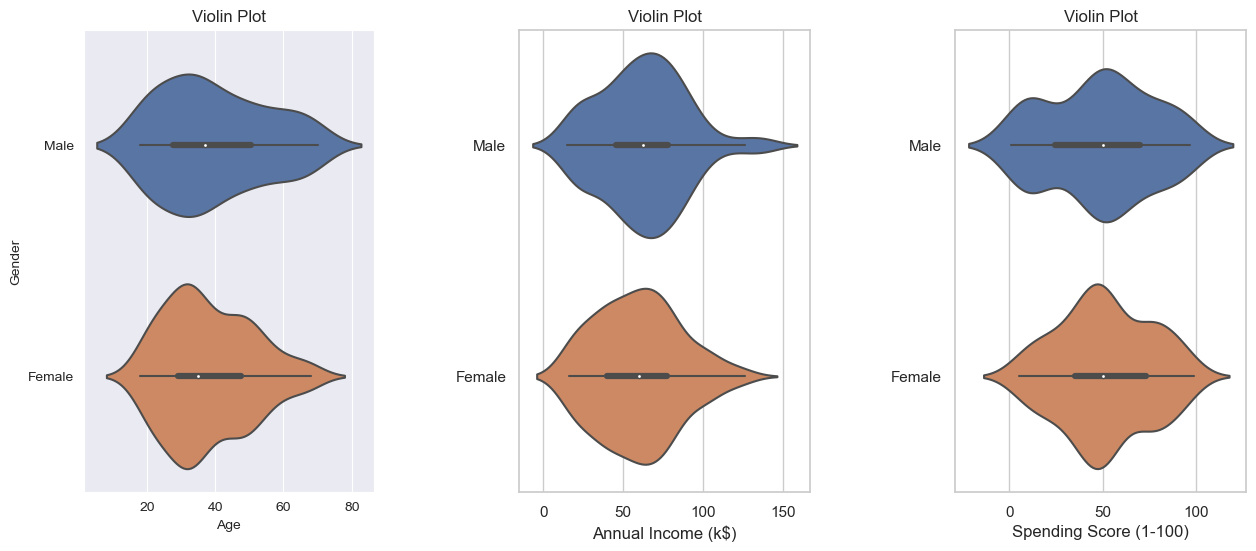

In [17]:
# Distribution of male & female population

plt.figure(1, figsize=(15,6))
n=0
for cols in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
  n+=1
  plt.subplot(1,3,n)
  sns.set(style="whitegrid")
  plt.subplots_adjust(hspace=0.5, wspace=0.5)
  sns.violinplot(x=cols, y='Gender', data=df)
  plt.ylabel('Gender' if n==1 else '')
  plt.title('Violin Plot')
plt.show()

# **Distribution of number of customers in each age group**

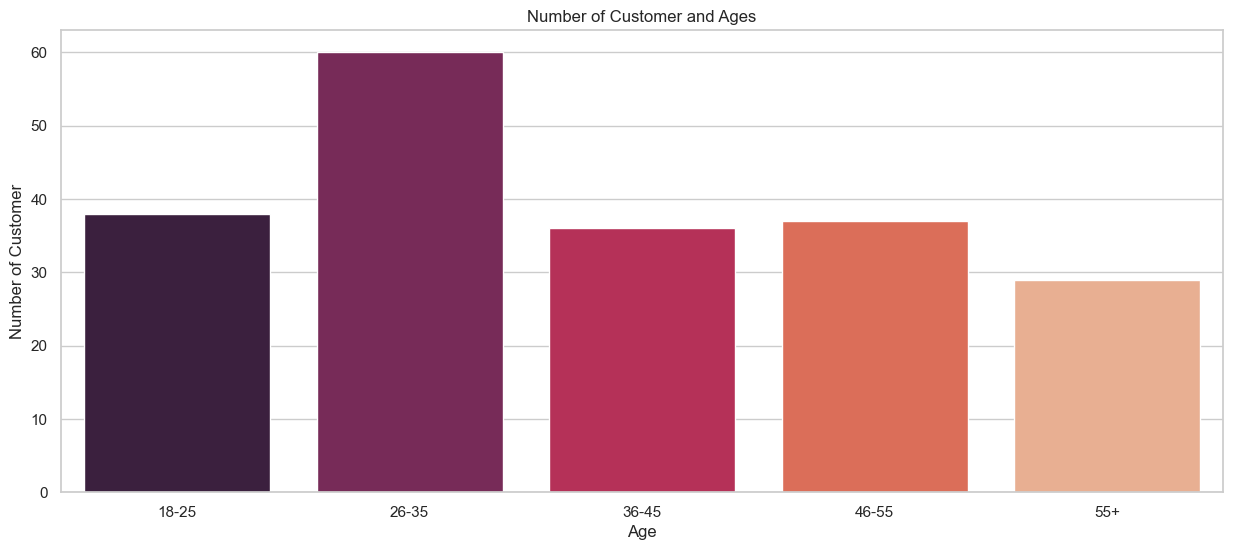

In [18]:
# Distribution of number of customers in each age group

age18_25 = df.Age[(df.Age <= 25) & (df.Age >= 18)]
age26_35 = df.Age[(df.Age <= 35) & (df.Age >= 26)]
age36_45 = df.Age[(df.Age <= 45) & (df.Age >= 36)]
age46_55 = df.Age[(df.Age <= 55) & (df.Age >= 46)]
age55above = df.Age[df.Age >= 56]
    
x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]
   
plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()


# **Number of customers according to their spending scores**

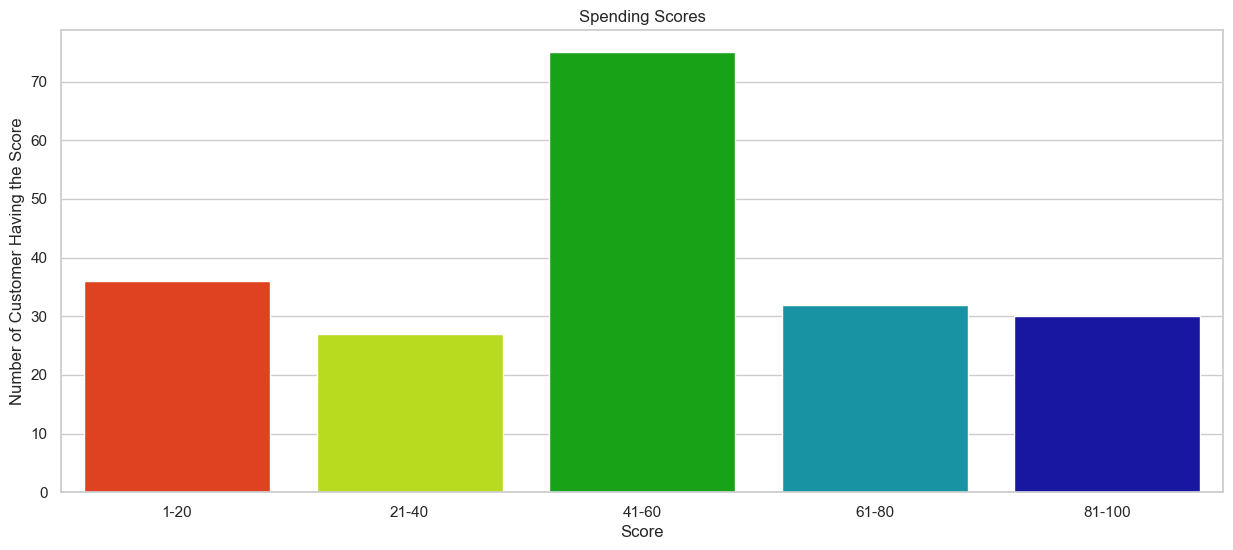

In [19]:
# Number of customers according to their spending scores
    
ss1_20 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 1) & (df["Spending Score (1-100)"] <= 20)]
ss21_40 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 21) & (df["Spending Score (1-100)"] <= 40)]
ss41_60 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 41) & (df["Spending Score (1-100)"] <= 60)]
ss61_80 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 61) & (df["Spending Score (1-100)"] <= 80)]
ss81_100 = df["Spending Score (1-100)"][(df["Spending Score (1-100)"] >= 81) & (df["Spending Score (1-100)"] <= 100)]
    
ssx = ["1-20", "21-40", "41-60", "61-80", "81-100"]
ssy = [len(ss1_20.values), len(ss21_40.values), len(ss41_60.values), len(ss61_80.values), len(ss81_100.values)]
   
plt.figure(figsize=(15,6))
sns.barplot(x=ssx, y=ssy, palette="nipy_spectral_r")
plt.title("Spending Scores")
plt.xlabel("Score")
plt.ylabel("Number of Customer Having the Score")
plt.show()

# **Number of customers according to their annual income**

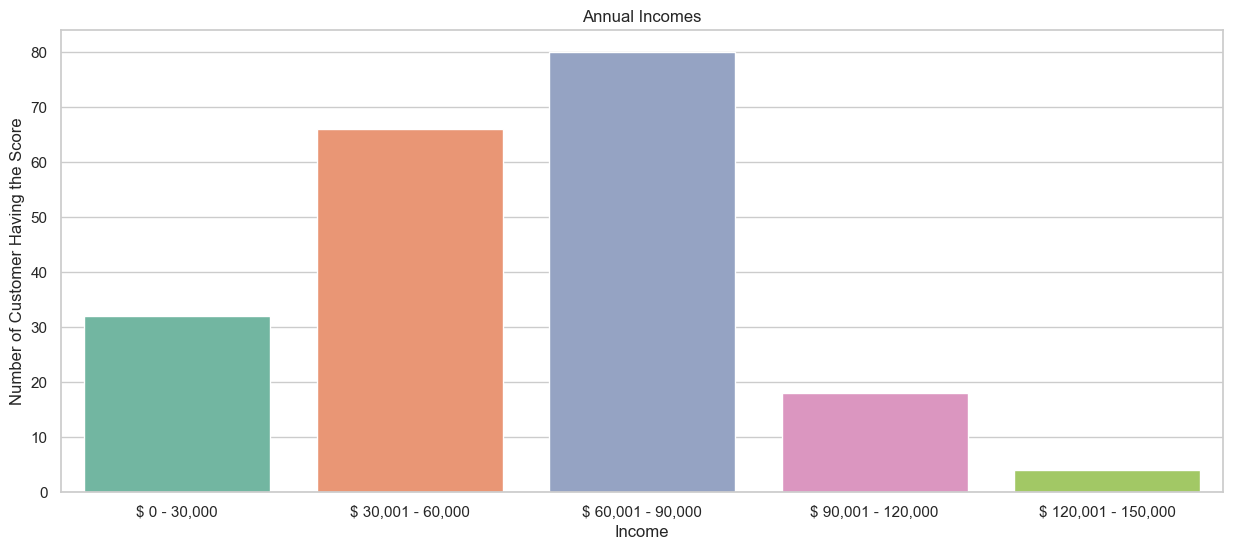

In [20]:
# Number of customers according to their annual income

ai0_30 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 0) & (df["Annual Income (k$)"] <= 30)]
ai31_60 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 31) & (df["Annual Income (k$)"] <= 60)]
ai61_90 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 61) & (df["Annual Income (k$)"] <= 90)]
ai91_120 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 91) & (df["Annual Income (k$)"] <= 120)]
ai121_150 = df["Annual Income (k$)"][(df["Annual Income (k$)"] >= 121) & (df["Annual Income (k$)"] <= 150)]
   
aix = ["$ 0 - 30,000", "$ 30,001 - 60,000", "$ 60,001 - 90,000", "$ 90,001 - 120,000", "$ 120,001 - 150,000"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=aix, y=aiy, palette="Set2")
plt.title("Annual Incomes")
plt.xlabel("Income")
plt.ylabel("Number of Customer Having the Score")
plt.show()

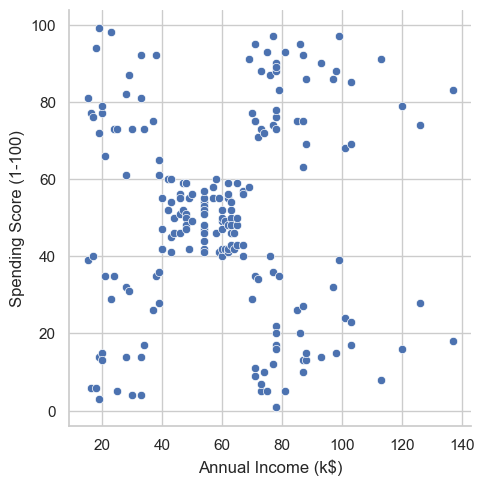

In [21]:
sns.relplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)

# **KMeans** **Clustering** **Algorithm**

**Clustering of Age, Annual Income and Spending Score**

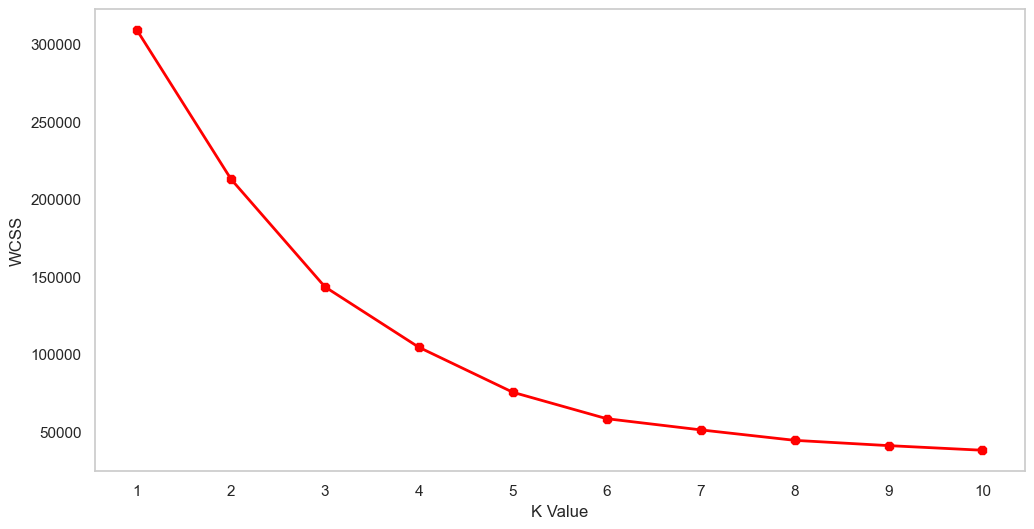

In [22]:
X3=df.iloc[:,1:]

from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
  kmeans = KMeans(n_clusters=k, init="k-means++")
  kmeans.fit(X3)
  wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6)) 
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

**Fitting KMeans Clustering to the dataset and predict the Cluster label**

In [23]:
km = KMeans(n_clusters=5)
clusters = km.fit_predict(X3)
print(clusters)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 4 3 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 1 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 1 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0]


In [24]:
print(kmeans.cluster_centers_)

[[3.24545455e+01 1.08181818e+02 8.27272727e+01 2.77972028e-01
  7.63785395e-01 8.33951763e-01]
 [5.61555556e+01 5.33777778e+01 4.90888889e+01 7.33760684e-01
  3.14571949e-01 4.90702948e-01]
 [2.48500000e+01 2.49500000e+01 8.10000000e+01 1.31730769e-01
  8.15573770e-02 8.16326531e-01]
 [2.97777778e+01 7.76666667e+01 8.11111111e+00 2.26495726e-01
  5.13661202e-01 7.25623583e-02]
 [4.61578947e+01 2.61052632e+01 1.74210526e+01 5.41497976e-01
  9.10267472e-02 1.67561762e-01]
 [2.70666667e+01 3.86000000e+01 5.21333333e+01 1.74358974e-01
  1.93442623e-01 5.21768707e-01]
 [4.10000000e+01 1.09700000e+02 2.20000000e+01 4.42307692e-01
  7.76229508e-01 2.14285714e-01]
 [2.70000000e+01 6.19629630e+01 4.77777778e+01 1.73076923e-01
  3.84942319e-01 4.77324263e-01]
 [3.27857143e+01 7.80357143e+01 8.18928571e+01 2.84340659e-01
  5.16686183e-01 8.25437318e-01]
 [4.88125000e+01 8.07500000e+01 1.95000000e+01 5.92548077e-01
  5.38934426e-01 1.88775510e-01]]


**Clustering Using KMeans Clustering**

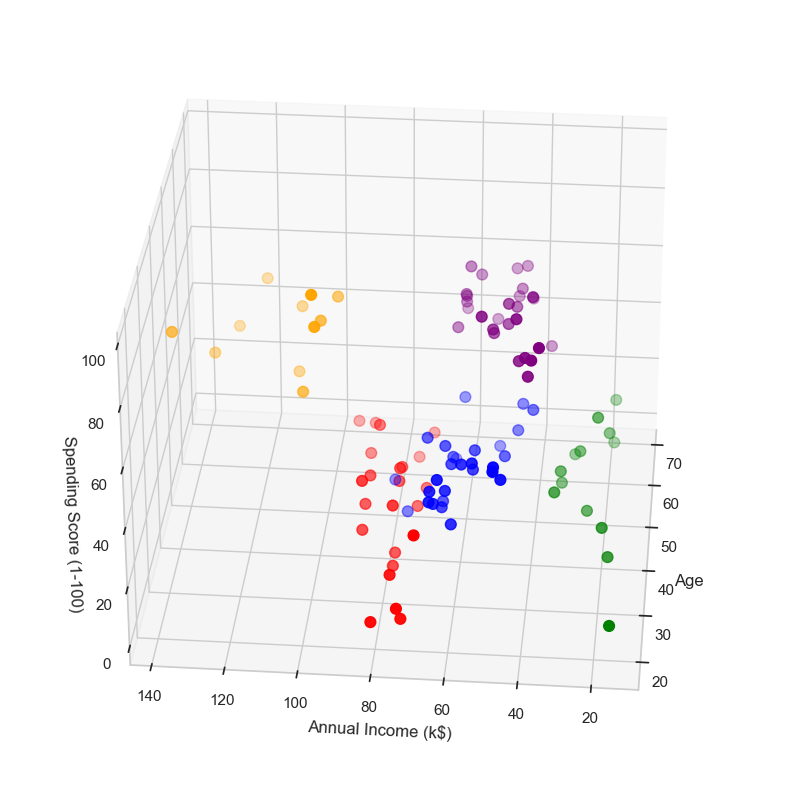

In [25]:
# KMeans Clustering

clusters = kmeans.fit_predict(X3)
df["label"] = clusters

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
   
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df["Age"][df.label == 0], df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=60)
ax.scatter(df["Age"][df.label == 1], df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=60)
ax.scatter(df["Age"][df.label == 2], df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=60)
ax.scatter(df["Age"][df.label == 3], df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=60)
ax.scatter(df["Age"][df.label == 4], df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=60)
ax.view_init(30, 185)

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel('Spending Score (1-100)')
plt.show()

# **Hierarchical** **Clustering** **Algorithm**

**Loading** **Data**

In [26]:

features = df.iloc[:, 2:5]
features.head()


,Annual Income (k$),Spending Score (1-100),scaled_Age
0,15,39,0.019231
1,15,81,0.057692
2,16,6,0.038462
3,16,77,0.096154
4,17,40,0.250000


**Dendrogram**

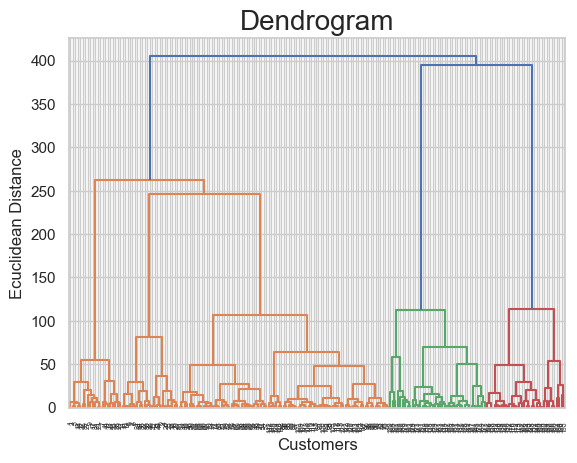

In [27]:
# Dendrograms

import scipy.cluster.hierarchy as sch

dendrogram = sch.dendrogram(sch.linkage(features, method = 'ward'))
plt.title('Dendrogram', fontsize = 20)
plt.xlabel('Customers')
plt.ylabel('Ecuclidean Distance')
plt.show()

**Fitting Hierarchical Clustering to the dataset and predict the Cluster label**

In [28]:
# Fitting Hierarchical Clustering to the dataset and predict the Cluster label

from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
cluster.fit_predict(features)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2], dtype=int64)

**Clustering Using Hierarchical Clustering**

Text(0, 0.5, 'Spending Score')

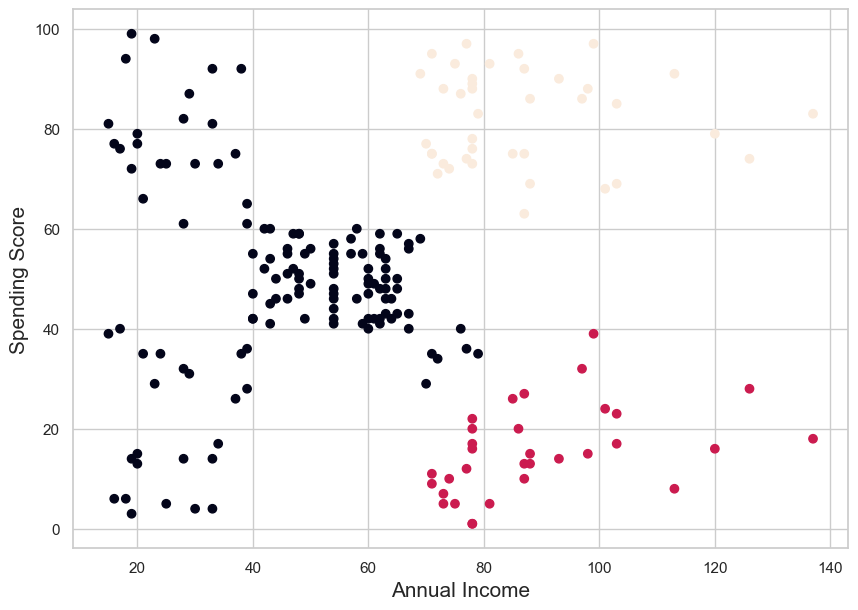

In [29]:
# Clustering Using Hierarchical Clustering

plt.figure(figsize=(10, 7))  
plt.scatter(features['Annual Income (k$)'], features['Spending Score (1-100)'], c=cluster.labels_)
plt.xlabel("Annual Income", fontsize = 15)
plt.ylabel("Spending Score", fontsize = 15)

# **DBSCAN Algorithm**

**Fitting DBSCAN to the dataset and predict the Cluster label**

In [30]:
# Fitting DBSCAN to the dataset and predict the Cluster label

from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=3, min_samples=4)
labels = dbscan.fit_predict(df.iloc[:, 2:5]) 
np.unique(labels)


array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64)

**Visualising the clusters**

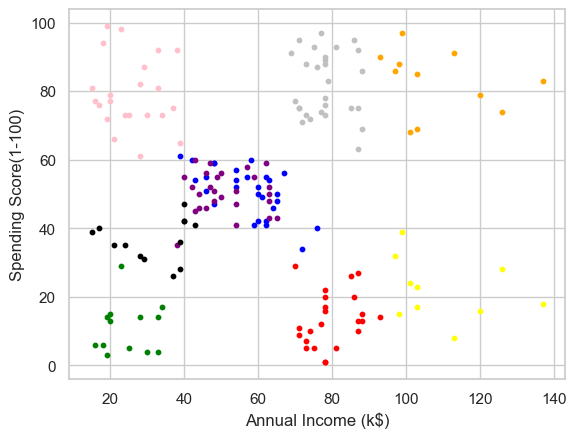

In [31]:
# Visualising the clusters

plt.scatter(df["Annual Income (k$)"][df.label == 0], df["Spending Score (1-100)"][df.label == 0], c='blue', s=10)
plt.scatter(df["Annual Income (k$)"][df.label == 1], df["Spending Score (1-100)"][df.label == 1], c='red', s=10)
plt.scatter(df["Annual Income (k$)"][df.label == 2], df["Spending Score (1-100)"][df.label == 2], c='green', s=10)
plt.scatter(df["Annual Income (k$)"][df.label == 3], df["Spending Score (1-100)"][df.label == 3], c='orange', s=10)
plt.scatter(df["Annual Income (k$)"][df.label == 4], df["Spending Score (1-100)"][df.label == 4], c='purple', s=10)
plt.scatter(df["Annual Income (k$)"][df.label == 5], df["Spending Score (1-100)"][df.label == 5], c='pink', s = 10)
plt.scatter(df["Annual Income (k$)"][df.label == 6], df["Spending Score (1-100)"][df.label == 6], c='yellow', s = 10)      
plt.scatter(df["Annual Income (k$)"][df.label == 7], df["Spending Score (1-100)"][df.label == 7], c='silver', s = 10)
plt.scatter(df["Annual Income (k$)"][df.label == 8], df["Spending Score (1-100)"][df.label == 8], c='black', s=10)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score(1-100)')
plt.show()

